In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic


In [8]:
from astropy.io import fits

# Load BGS observed catalogue
with fits.open('/n17data/murray/desi_data/DESI/shape_catalogs/BGS_ANY_unions_desi_matched_observed.fits') as hdul_bgs:
    bgs_data = hdul_bgs[1].data

# Load LRG observed catalogue
with fits.open('/n17data/murray/desi_data/DESI/shape_catalogs/LRG_unions_desi_matched_observed.fits') as hdul_lrg:
    lrg_data = hdul_lrg[1].data

In [9]:
bgs_data.columns

ColDefs(
    name = 'RA'; format = 'E'
    name = 'Dec'; format = 'E'
    name = 'e1'; format = 'E'
    name = 'e2'; format = 'E'
    name = 'w_iv'; format = 'E'
    name = 'galaxy_RA'; format = 'E'
    name = 'galaxy_Dec'; format = 'E'
    name = 'redshift'; format = 'E'
    name = 'mag'; format = 'E'
    name = 'flux_radius'; format = 'E'
    name = 'snr'; format = 'E'
    name = 'w_des'; format = 'E'
    name = 'e1_uncal'; format = 'E'
    name = 'e2_uncal'; format = 'E'
    name = 'delta_size'; format = 'E'
)

In [10]:
bgs_df['redshift'].values

NameError: name 'bgs_df' is not defined

In [12]:
bins = np.linspace(0, 1.2, 25)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

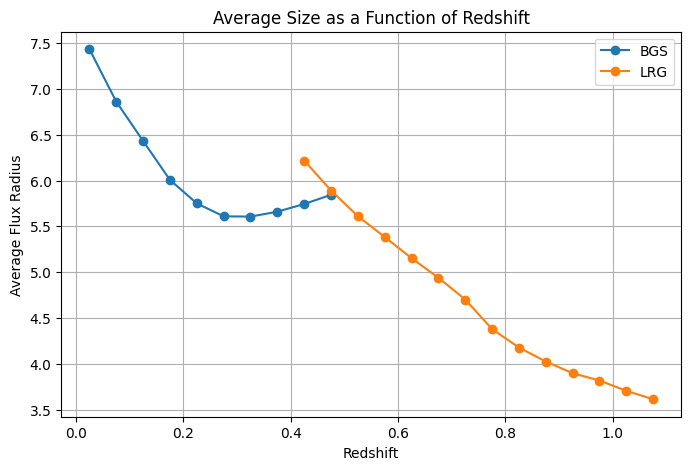

In [13]:
# Remove NaNs for redshift and flux_radius in BGS
z = bgs_data['redshift']
size = bgs_data['flux_radius']

valid_indices = (~np.isnan(z)) & (~np.isnan(size)) & (np.abs(size) < 40)
z = z[valid_indices]
size = size[valid_indices]

# Compute average size in each redshift bin (using the same bins)
avg_size, _, _ = binned_statistic(z, size, statistic='mean', bins=bins)

# Remove NaNs for redshift and flux_radius in LRG
z_lrg = lrg_data['redshift']
size_lrg = lrg_data['flux_radius']

valid_indices_lrg = (~np.isnan(z_lrg)) & (~np.isnan(size_lrg)) & (np.abs(size_lrg) < 40)
z_lrg = z_lrg[valid_indices_lrg]
size_lrg = size_lrg[valid_indices_lrg]

# Compute average size in each redshift bin (using the same bins)
avg_size_lrg, _, _ = binned_statistic(z_lrg, size_lrg, statistic='mean', bins=bins)

# Plot both BGS and LRG
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_size, marker='o', label='BGS')
plt.plot(bin_centers, avg_size_lrg, marker='o', label='LRG')
plt.xlabel('Redshift')
plt.ylabel('Average Flux Radius')
plt.title('Average Size as a Function of Redshift')
plt.legend()
plt.grid(True)
plt.show()


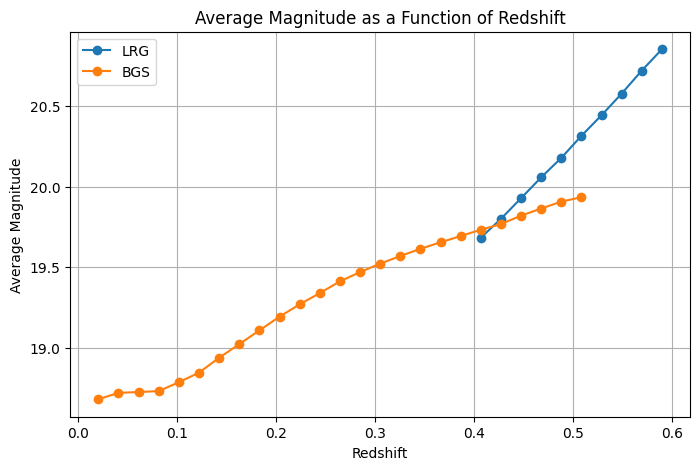

In [26]:
# Remove NaNs for redshift and mag in LRG
z_mag_lrg = lrg_data['redshift']
mag_lrg = lrg_data['mag']

# remove NaN values
valid_indices_mag_lrg = (~np.isnan(z_mag_lrg)) & (~np.isnan(mag_lrg))
z_mag_lrg = z_mag_lrg[valid_indices_mag_lrg]
mag_lrg = mag_lrg[valid_indices_mag_lrg]

# Compute average mag in each redshift bin (using the same bins)
avg_mag_lrg, _, _ = binned_statistic(z_mag_lrg, mag_lrg, statistic='mean', bins=bins)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_mag_lrg, marker='o', label='LRG')
plt.plot(bin_centers, avg_mag, marker='o', label='BGS')
plt.xlabel('Redshift')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude as a Function of Redshift')
plt.legend()
plt.grid(True)
plt.show()


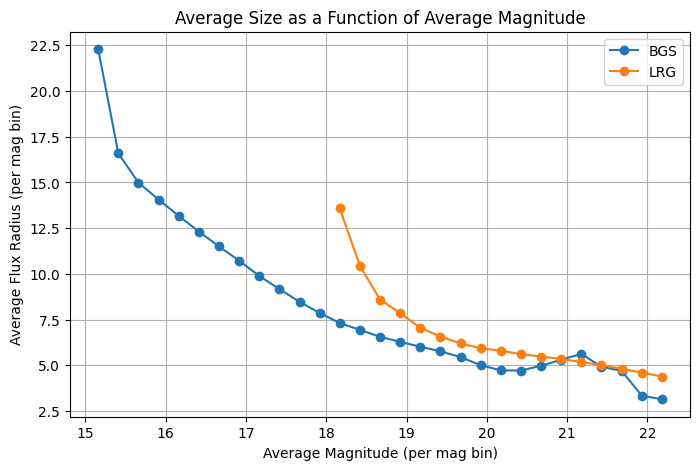

In [34]:
mag_lrg = lrg_data['mag']
size_lrg = lrg_data['flux_radius']

mag = bgs_data['mag']
size = bgs_data['flux_radius']


# Recompute valid indices for BGS
valid_indices_mag = (~np.isnan(mag)) & (~np.isnan(size))
# Recompute valid indices for LRG
valid_indices_mag_lrg = (~np.isnan(mag_lrg)) & (~np.isnan(size_lrg))

# Compute average size in each magnitude bin for BGS
avg_size_mag_bgs, _, _ = binned_statistic(mag[valid_indices_mag], size[valid_indices_mag], statistic='mean', bins=mag_bins)

# Compute average size in each magnitude bin for LRG
avg_size_mag_lrg, _, _ = binned_statistic(mag_lrg[valid_indices_mag_lrg], size_lrg[valid_indices_mag_lrg], statistic='mean', bins=mag_bins)

plt.figure(figsize=(8, 5))
plt.plot(mag_bin_centers, avg_size_mag_bgs, marker='o', label='BGS')
plt.plot(mag_bin_centers, avg_size_mag_lrg, marker='o', label='LRG')
plt.xlabel('Average Magnitude (per mag bin)')
plt.ylabel('Average Flux Radius (per mag bin)')
plt.title('Average Size as a Function of Average Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
z

array([0.25333345, 0.23779964, 0.25424543, ..., 0.34344396, 0.35935822,
       0.19245692], dtype='>f4')

In [46]:
print(mag.shape, z.shape, size.shape)


(1014349,) (1014345,) (1014349,)


In [52]:
from scipy.stats import binned_statistic_2d

z = bgs_data['redshift']
size = bgs_data['flux_radius']
mag = bgs_data['mag']

z_lrg = lrg_data['redshift']
mag_lrg = lrg_data['mag']
size_lrg = lrg_data['flux_radius']

# Use only valid data for BGS
stat_bgs, x_edge_bgs, y_edge_bgs, binnumber_bgs = binned_statistic_2d(
    mag, z, size,
    statistic='mean', bins=50 )

# Use only valid data for LRG
stat_lrg, x_edge_lrg, y_edge_lrg, binnumber_lrg = binned_statistic_2d(
    mag_lrg, z_lrg, size_lrg,
    statistic='mean', bins=50
)


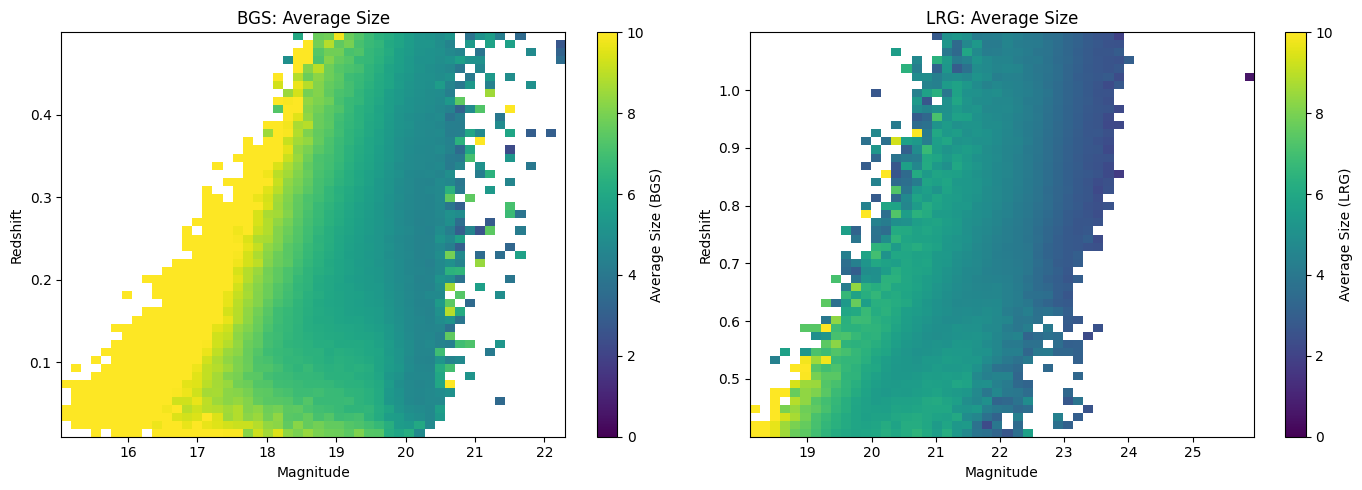

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# BGS
im0 = axs[0].imshow(stat_bgs.T, origin='lower', aspect='auto',
                    extent=[x_edge_bgs[0], x_edge_bgs[-1], y_edge_bgs[0], y_edge_bgs[-1]],
                    cmap='viridis', interpolation='nearest', vmin=0, vmax=10)
axs[0].set_xlabel('Magnitude')
axs[0].set_ylabel('Redshift')
axs[0].set_title('BGS: Average Size')
fig.colorbar(im0, ax=axs[0], label='Average Size (BGS)')

# LRG
im1 = axs[1].imshow(stat_lrg.T, origin='lower', aspect='auto',
                    extent=[x_edge_lrg[0], x_edge_lrg[-1], y_edge_lrg[0], y_edge_lrg[-1]],
                    cmap='viridis', interpolation='nearest', vmin=0, vmax=10)
axs[1].set_xlabel('Magnitude')
axs[1].set_ylabel('Redshift')
axs[1].set_title('LRG: Average Size')
fig.colorbar(im1, ax=axs[1], label='Average Size (LRG)')

plt.tight_layout()
plt.show()

In [57]:
from scipy.interpolate import RectBivariateSpline

z = bgs_data['redshift']
size = bgs_data['flux_radius']
mag = bgs_data['mag']

z_lrg = lrg_data['redshift']
mag_lrg = lrg_data['mag']
size_lrg = lrg_data['flux_radius']

# Prepare grid centers for interpolation
mag_centers_bgs = 0.5 * (x_edge_bgs[:-1] + x_edge_bgs[1:])
z_centers_bgs = 0.5 * (y_edge_bgs[:-1] + y_edge_bgs[1:])
mag_centers_lrg = 0.5 * (x_edge_lrg[:-1] + x_edge_lrg[1:])
z_centers_lrg = 0.5 * (y_edge_lrg[:-1] + y_edge_lrg[1:])

# Replace NaNs with nearest valid values for interpolation
stat_bgs_filled = np.where(np.isnan(stat_bgs), np.nanmean(stat_bgs), stat_bgs)
stat_lrg_filled = np.where(np.isnan(stat_lrg), np.nanmean(stat_lrg), stat_lrg)

# Create smooth 2D interpolators
size_bgs_interp = RectBivariateSpline(mag_centers_bgs, z_centers_bgs, stat_bgs_filled)
size_lrg_interp = RectBivariateSpline(mag_centers_lrg, z_centers_lrg, stat_lrg_filled)

# For each BGS galaxy
size_bgs_pred = size_bgs_interp.ev(mag, z)
residual_bgs = size - size_bgs_pred

# For each LRG galaxy
size_lrg_pred = size_lrg_interp.ev(mag_lrg, z_lrg)
residual_lrg = size_lrg - size_lrg_pred

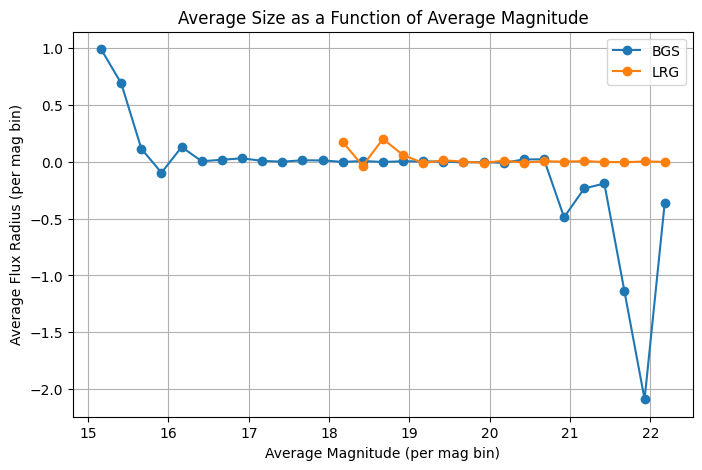

In [58]:
# Compute average size in each magnitude bin for BGS
avg_size_mag_bgs, _, _ = binned_statistic(mag, residual_bgs, statistic='mean', bins=mag_bins)

# Compute average size in each magnitude bin for LRG
avg_size_mag_lrg, _, _ = binned_statistic( mag_lrg , residual_lrg , statistic='mean', bins=mag_bins)

plt.figure(figsize=(8, 5))
plt.plot(mag_bin_centers, avg_size_mag_bgs, marker='o', label='BGS')
plt.plot(mag_bin_centers, avg_size_mag_lrg, marker='o', label='LRG')
plt.xlabel('Average Magnitude (per mag bin)')
plt.ylabel('Average Flux Radius (per mag bin)')
plt.title('Average Size as a Function of Average Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from astropy.io.fits import ColDefs, Column, BinTableHDU

# Add residuals to the BGS and LRG FITS_rec arrays as new columns

# For BGS

# Create new column for residuals in BGS
bgs_residual_col = Column(name='delta_size', array=residual_bgs, format='E')
bgs_cols = bgs_data.columns + bgs_residual_col
bgs_data_with_residual = fits.FITS_rec.from_columns(bgs_cols)

# For LRG
lrg_residual_col = Column(name='delta_size', array=residual_lrg, format='E')
lrg_cols = lrg_data.columns + lrg_residual_col
lrg_data_with_residual = fits.FITS_rec.from_columns(lrg_cols)

In [61]:
from astropy.io import fits

# Save the updated BGS and LRG catalogues with residuals to the original FITS files

# Overwrite the original files with the new tables
fits.writeto('/n17data/murray/desi_data/DESI/shape_catalogs/BGS_ANY_unions_desi_matched_observed.fits',
             hdul_bgs[0].data, header=hdul_bgs[0].header, overwrite=True)
fits.append('/n17data/murray/desi_data/DESI/shape_catalogs/BGS_ANY_unions_desi_matched_observed.fits',
            bgs_data_with_residual)

fits.writeto('/n17data/murray/desi_data/DESI/shape_catalogs/LRG_unions_desi_matched_observed.fits',
             hdul_lrg[0].data, header=hdul_lrg[0].header, overwrite=True)
fits.append('/n17data/murray/desi_data/DESI/shape_catalogs/LRG_unions_desi_matched_observed.fits',
            lrg_data_with_residual)

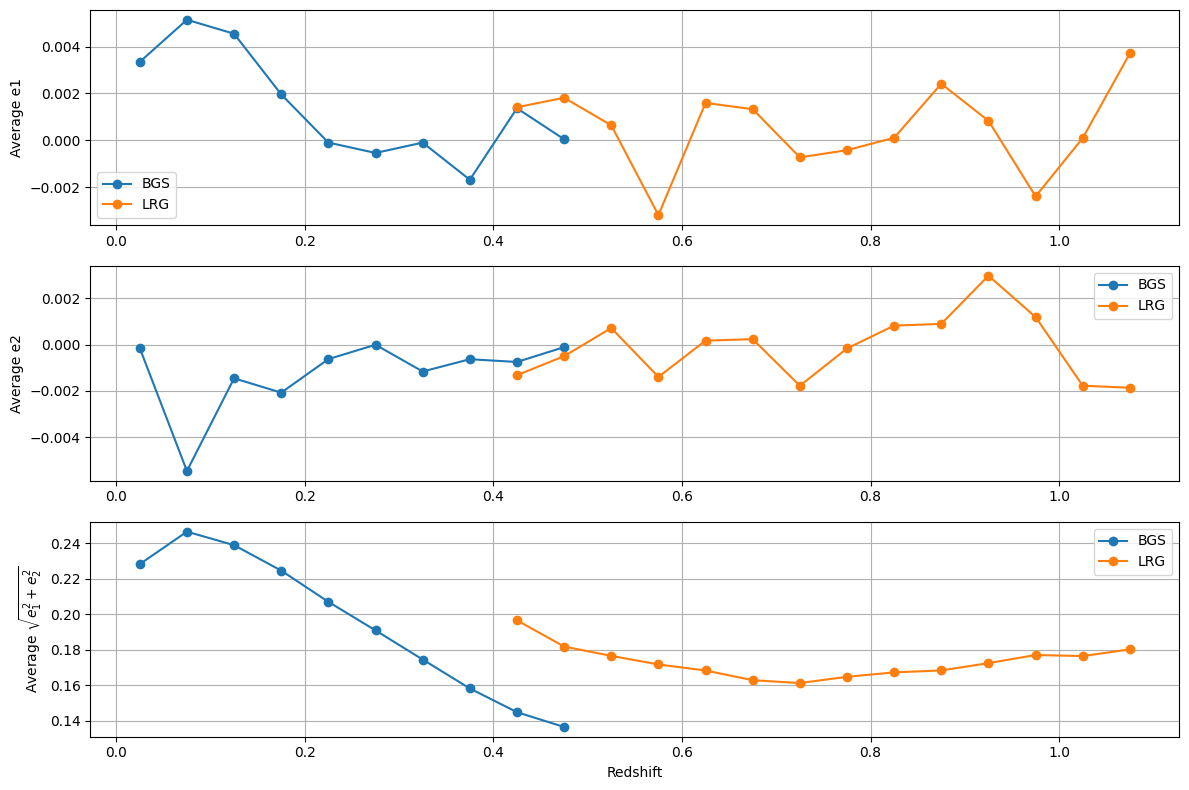

In [14]:
# Remove NaNs for redshift, e1, e2 in BGS
z = bgs_data['redshift']
e1 = bgs_data['e1']
e2 = bgs_data['e2']
ell = np.sqrt(e1**2 + e2**2)

valid_indices = (~np.isnan(z)) & (~np.isnan(e1)) & (~np.isnan(e2))
z_valid = z[valid_indices]
e1_valid = e1[valid_indices]
e2_valid = e2[valid_indices]
ell_valid = ell[valid_indices]

# Compute average e1, e2, ell in each redshift bin (using the same bins)
avg_e1, _, _ = binned_statistic(z_valid, e1_valid, statistic='mean', bins=bins)
avg_e2, _, _ = binned_statistic(z_valid, e2_valid, statistic='mean', bins=bins)
avg_ell, _, _ = binned_statistic(z_valid, ell_valid, statistic='mean', bins=bins)

# Remove NaNs for redshift, e1, e2 in LRG
z_lrg = lrg_data['redshift']
e1_lrg = lrg_data['e1']
e2_lrg = lrg_data['e2']
ell_lrg = np.sqrt(e1_lrg**2 + e2_lrg**2)

valid_indices_lrg = (~np.isnan(z_lrg)) & (~np.isnan(e1_lrg)) & (~np.isnan(e2_lrg))
z_lrg_valid = z_lrg[valid_indices_lrg]
e1_lrg_valid = e1_lrg[valid_indices_lrg]
e2_lrg_valid = e2_lrg[valid_indices_lrg]
ell_lrg_valid = ell_lrg[valid_indices_lrg]

# Compute average e1, e2, ell in each redshift bin (using the same bins)
avg_e1_lrg, _, _ = binned_statistic(z_lrg_valid, e1_lrg_valid, statistic='mean', bins=bins)
avg_e2_lrg, _, _ = binned_statistic(z_lrg_valid, e2_lrg_valid, statistic='mean', bins=bins)
avg_ell_lrg, _, _ = binned_statistic(z_lrg_valid, ell_lrg_valid, statistic='mean', bins=bins)

# Plot all three for BGS and LRG
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(bin_centers, avg_e1, marker='o', label='BGS')
plt.plot(bin_centers, avg_e1_lrg, marker='o', label='LRG')
plt.ylabel('Average e1')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(bin_centers, avg_e2, marker='o', label='BGS')
plt.plot(bin_centers, avg_e2_lrg, marker='o', label='LRG')
plt.ylabel('Average e2')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(bin_centers, avg_ell, marker='o', label='BGS')
plt.plot(bin_centers, avg_ell_lrg, marker='o', label='LRG')
plt.xlabel('Redshift')
plt.ylabel(r'Average $\sqrt{e_1^2 + e_2^2}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()